<a href="https://colab.research.google.com/github/niplessa/Thesis_Data-mining-study-on-medical-and-sociological-Data-regarding-Covid19/blob/main/Predictions_1_SIR_TDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SIR model simulation


## Part1
- The simplest approach: S/I/R model  
  *taken from:*

https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc  

https://github.com/henrifroese/infectious_disease_modelling/blob/master/part_one.ipynb

In [ ]:
#import libraries
from scipy.integrate import odeint #integrate ODEs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("whitegrid")
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 5.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=0297f8884de62f7cf6d04b3cbc6d70d93528377182f1f407f709816ad7f49b50
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


## SIR variables:

N: total population <br>
S(t): number of people susceptible on day t  
I(t): number of people infected on day t  
R(t): number of people recovered on day t  
β: expected amount of people an infected person infects per day  
D: number of days an infected person has and can spread the disease  
γ: the proportion of infected recovering per day (γ = 1/D)  
R₀: the total number of people an infected person infects (R₀ = β / γ)  


## ODEs:

$dS/dt = -(β*I*S)/N$ -> **Subsecible**  
<br>
$dI/dt = +(β*I*S)/N$ -> **Infected**  
<br>
$dR/dt = γ*I$ -> **Recovered**

In [ ]:
#create a function to calculate dS/dt, dI/dt , dR/dt 
def deriv(y, t, N, beta, gamma):
    S, I, R = y #y is a list?
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

## Simple test conditions

In [ ]:
N = 1000 #population 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D #g is inverse of D

#init conditions
S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [ ]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [ ]:
#function for plotting the results

def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(15,8))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_title("SIR Model",fontsize=25)

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

#Scenario 1 for:

- t = 50 days
- beta = 1
- D = 4 days
- gamma = 1/4 
- R0 = beta/gamma = 4 (high reproductive index)

## On day 0: 1 person is infected, 999 are subsecible

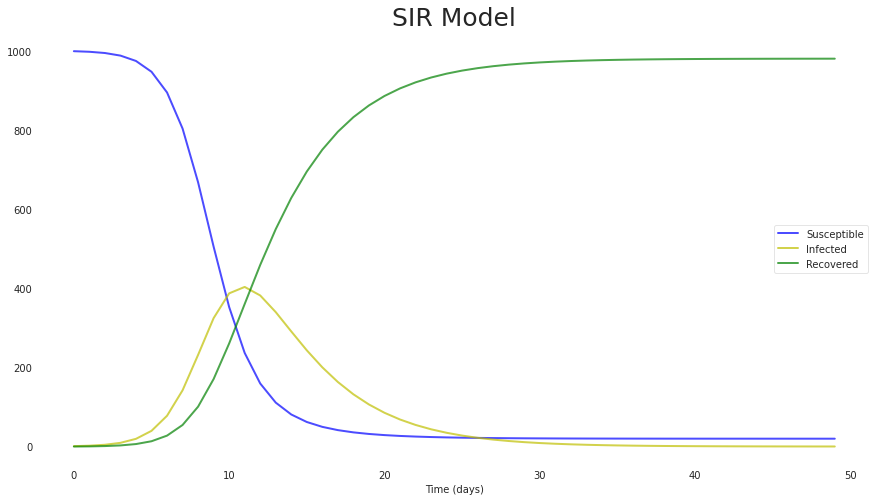

In [ ]:
plotsir(t, S, I, R)

## Scenario 2

In [ ]:
N = 5000 #population 1000
beta = 1.5  # infected person infects 1 other person per day
D = 2.0 # infections lasts four days
gamma = 1.0 / D #g is inverse of D

#init conditions
S0, I0, R0 = 4950, 50, 0  # initial conditions: one infected, rest susceptible

In [ ]:
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

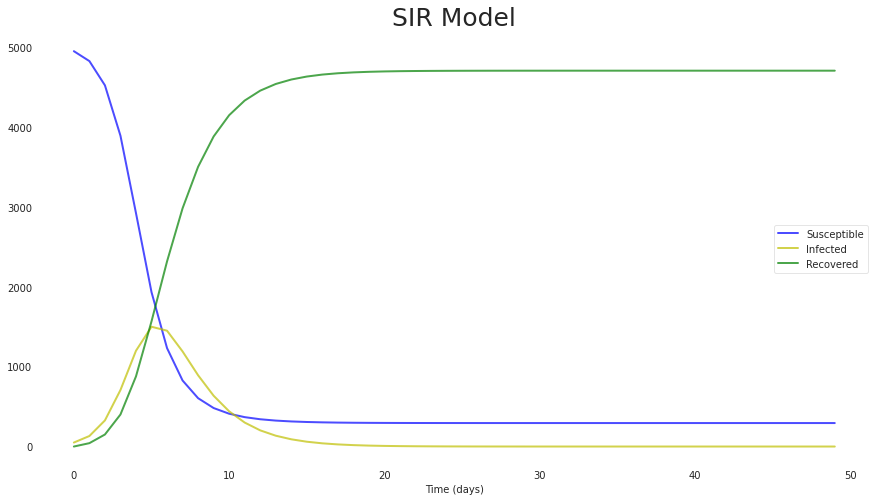

In [ ]:
plotsir(t, S, I, R)

#Part 2:
## Beyond the simple SIR model  

taken from:  

https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4


https://github.com/henrifroese/infectious_disease_modelling/blob/master/part_two.ipynb

In [ ]:
#function for plotting
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
  f, ax = plt.subplots(1,1,figsize=(15,9))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.title("SEIRD Model")

  else:
    ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.title("SEIR Model")

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))
  
  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();


## SEIR model (E=Exposed, not yet infectious)

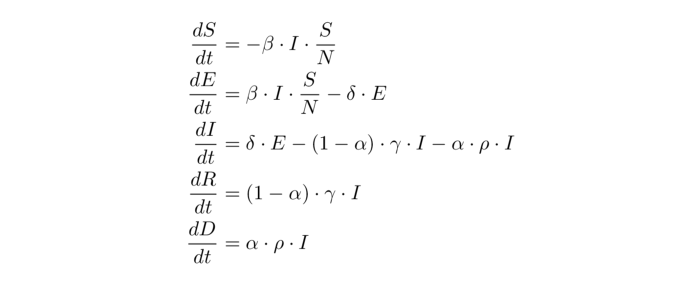



In [ ]:
#SEIR functions (ODEs)
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [ ]:
# a simple SEIR simulation

N = 1_000_000 #pop is 1 million
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed 

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

In [ ]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

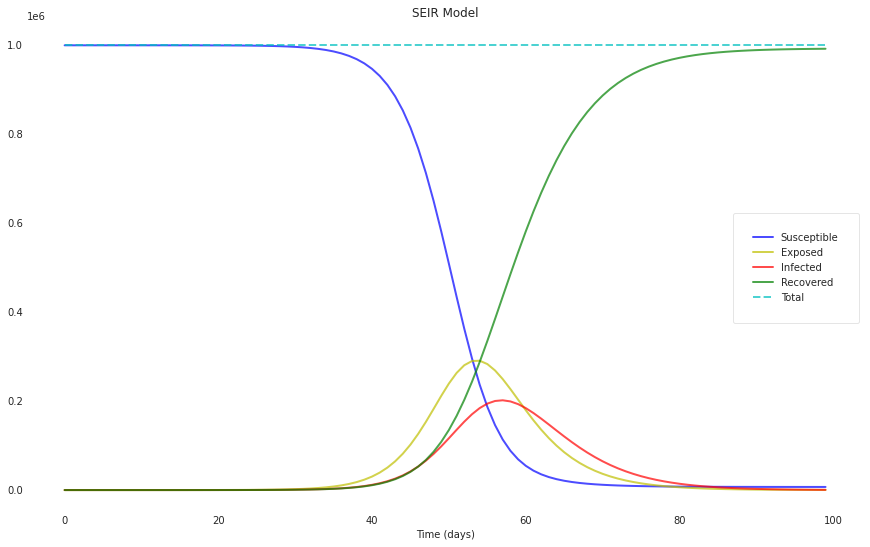

In [ ]:
plotseird(t, S, E, I, R)

## Model SEI-RD (Recovered | Dead)

### SEIRD equations:


In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
#a simiple SEIRD simulation

N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

In [ ]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

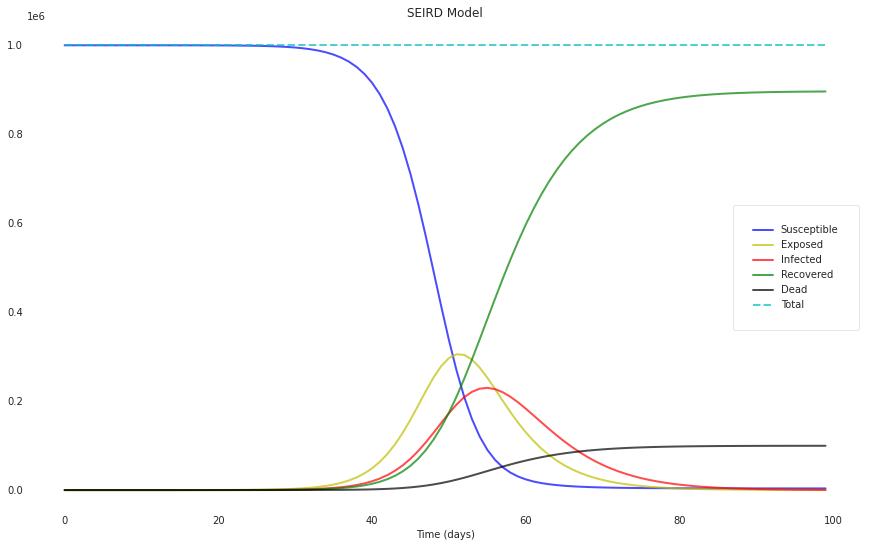

In [ ]:
plotseird(t, S, E, I, R, D)

##Time-Dependent $R_{0}$
###Simple Approach: Single Lockdown

- R0 switches from a high value to <1 when a Lockdown happens on day L.


In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


In [ ]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death

In [ ]:
L = 40 #day of lockdown

In [ ]:
def R_0(t):
    return 5.0 if t < L else 0.9
#before L R0 is 5 after L is 0.9

In [ ]:
def beta(t):
    return R_0(t) * gamma
#beta is a function of R0

In [ ]:
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

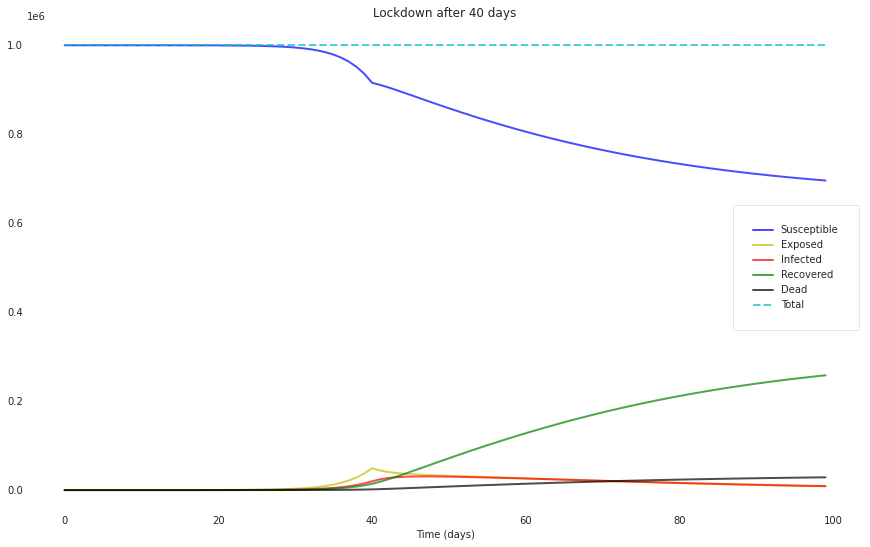

In [ ]:
plotseird(t, S, E, I, R, D, L)

## $R_{0}$ changes dynamically (Logistic function)

In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

In [ ]:
def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

In [ ]:
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values

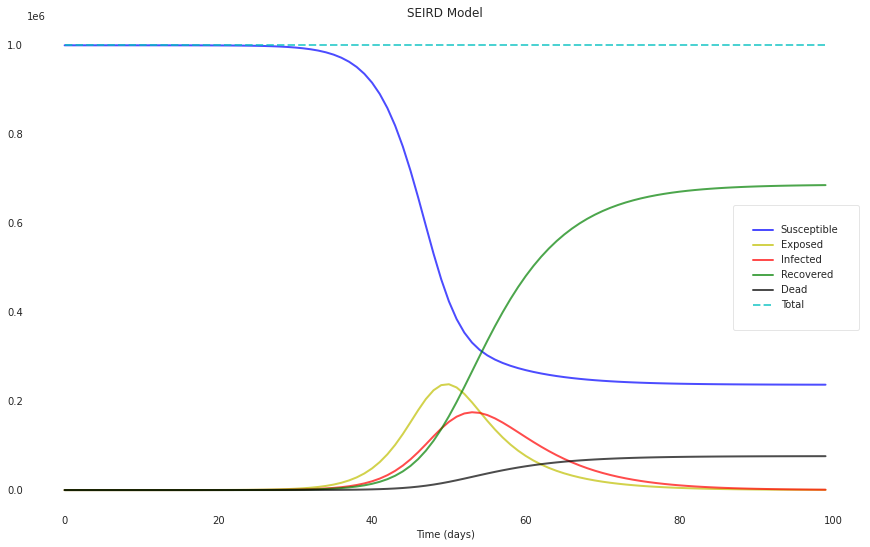

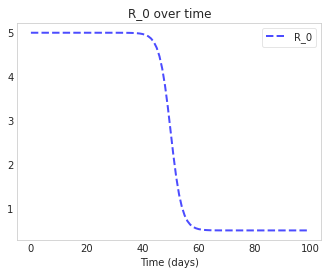

In [ ]:
plotseird(t, S, E, I, R, D, R0=R0_over_time)

## Add Health system resources and Age groups fatality rate

In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S, E, I, R, D = y
    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * rho * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

In [ ]:
def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

In [ ]:
#age groups
alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

In [ ]:
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

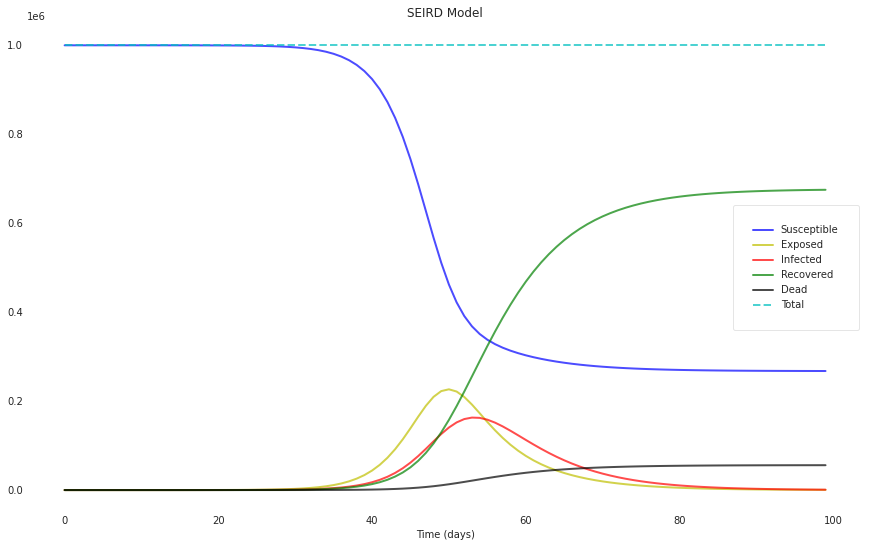

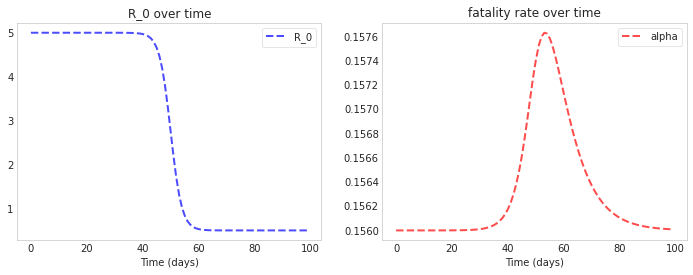

In [ ]:
plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)



---



# Part 3
## Fit model to actual data

taken from:  
https://towardsdatascience.com/infectious-disease-modelling-fit-your-model-to-coronavirus-data-2568e672dbc7

https://github.com/henrifroese/infectious_disease_modelling/blob/master/part_three.ipynb

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

from scipy.integrate import odeint
!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 266kB 5.5MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 256kB 16.3MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=b47f74e1008d49f29ab82701c7cd421990d02189379acae31b6ba3acbbf577e0
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl size=17287 sha256=8ddbfb26591ccfe81837712291e3af2dc2243ea361e954e6af928c44729eeb00
  Stored in directory: /root/.cache/pip/wheels/53/9d/3b/da1ff15feb7d97bb195837f4e78f971c748a945bd4720003ce
Successfully built lmfit asteval


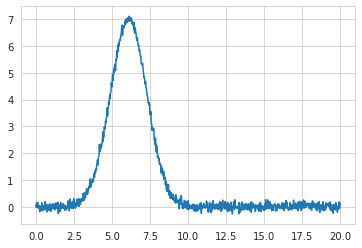

In [ ]:
#fit curve
np.random.seed(42)
x = np.linspace(0, 20.0, 1001)

data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=x.size))  # normal distr. with some noise
plt.plot(x, data);

In [ ]:
def f(x, a, b, c):
    return gaussian(x, a, b, c)

In [ ]:
mod = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=10.0, vary=True)
mod.set_param_hint("b", value=10.0, vary=True)
mod.set_param_hint("c", value=10.0, vary=True)

params = mod.make_params()

In [ ]:
result = mod.fit(data, params, method="leastsq", x=x)  # fitting

{'a': 21.032607052666833, 'b': 6.100343154227002, 'c': 1.200925508808406}

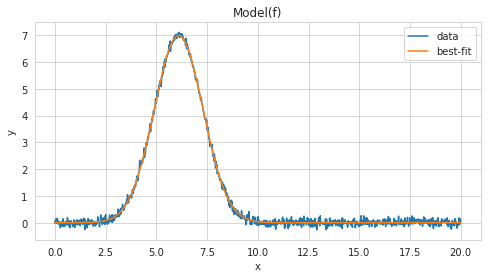

In [ ]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

In [ ]:
result

### Import Datasets

In [ ]:
# read the data
beds = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv", header=0) #hospital beds per 100k people
agegroups = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/agegroups.csv") #agegroup per country
probabilities = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv") #probability to enter critical per age group
covid_data = pd.read_csv("https://tinyurl.com/t59cgxn", parse_dates=["Date"], skiprows=[1])
covid_data["Location"] = covid_data["Country/Region"]


In [ ]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code,Location
0,NaN,Afghanistan,33.939110,67.709953,2020-11-22,1687,AFG,142.0,34.0,NaN,Afghanistan
1,NaN,Afghanistan,33.939110,67.709953,2020-11-21,1675,AFG,142.0,34.0,NaN,Afghanistan
2,NaN,Afghanistan,33.939110,67.709953,2020-11-20,1661,AFG,142.0,34.0,NaN,Afghanistan
3,NaN,Afghanistan,33.939110,67.709953,2020-11-19,1650,AFG,142.0,34.0,NaN,Afghanistan
4,NaN,Afghanistan,33.939110,67.709953,2020-11-18,1645,AFG,142.0,34.0,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
82309,NaN,Zimbabwe,-19.015438,29.154857,2020-01-26,0,ZWE,2.0,202.0,14.0,Zimbabwe
82310,NaN,Zimbabwe,-19.015438,29.154857,2020-01-25,0,ZWE,2.0,202.0,14.0,Zimbabwe
82311,NaN,Zimbabwe,-19.015438,29.154857,2020-01-24,0,ZWE,2.0,202.0,14.0,Zimbabwe
82312,NaN,Zimbabwe,-19.015438,29.154857,2020-01-23,0,ZWE,2.0,202.0,14.0,Zimbabwe


In [ ]:
beds.head()

,Country,Continent,ICU_Beds
0,Japan,Asia,7.3
1,South Korea,Asia,10.6
2,Russia,Europe,8.3
3,Germany,Europe,29.2
4,Austria,Europe,21.8


In [ ]:
agegroups.head()

,Unnamed: 0,Location,0_9,10_19,20_29,30_39,40_49,50_59,60_69,70_79,80_89,90_100,Total
0,0,World,1.342381e+09,1.253463e+09,1.192080e+09,1.150350e+09,973155000.0,833622000.0,591786000.0,312459000.0,124116000.0,20814000.0,7.794226e+09
1,1,Sustainable Development Goal (SDG) regions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,2,Sub-Saharan Africa,3.243990e+08,2.534300e+08,1.851890e+08,1.334170e+08,89292000.0,56464000.0,33385000.0,15120000.0,3477000.0,191000.0,1.094364e+09
3,3,Eastern Africa,1.300380e+08,1.056750e+08,7.815600e+07,5.410800e+07,35271000.0,21714000.0,12849000.0,5978000.0,1513000.0,102000.0,4.454040e+08
4,4,Burundi,3.873000e+06,2.725000e+06,2.030000e+06,1.539000e+06,748000.0,492000.0,339000.0,112000.0,30000.0,2000.0,1.189000e+07


In [ ]:
probabilities.head()

,Age,prob_I_to_ICU_1,prob_ICU_to_Death_1,prob_I_to_ICU_2,prob_ICU_to_Death_2
0,0_9,0.001,0.00,0.001,0.00
1,10_19,0.003,0.00,0.003,0.00
2,20_29,0.009,0.05,0.006,0.00
3,30_39,0.025,0.06,0.009,0.00
4,40_49,0.030,0.10,0.025,0.12


In [ ]:
covid_data=covid_data.drop(["Province/State","Lat","Long", 'ISO 3166-1 Alpha 3-Codes','Region Code','Sub-region Code','Intermediate Region Code'],axis=1)

In [ ]:
covid_data.head()

,Country/Region,Date,Value,Location
0,Afghanistan,2020-11-22,1687,Afghanistan
1,Afghanistan,2020-11-21,1675,Afghanistan
2,Afghanistan,2020-11-20,1661,Afghanistan
3,Afghanistan,2020-11-19,1650,Afghanistan
4,Afghanistan,2020-11-18,1645,Afghanistan


In [ ]:
# create some dicts for fast lookup
# 1. beds
beds_lookup = dict(zip(beds["Country"], beds["ICU_Beds"]))
# 2. agegroups
agegroup_lookup = dict(zip(agegroups['Location'], agegroups[['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_100']].values))

In [ ]:
# store the probabilities collected
prob_I_to_C_1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I_to_C_2 = list(probabilities.prob_I_to_ICU_2.values)
prob_C_to_Death_1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_C_to_Death_2 = list(probabilities.prob_ICU_to_Death_2.values)

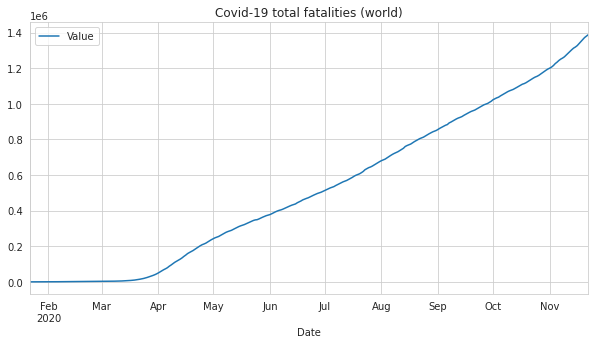

In [ ]:
covid_data.groupby("Date").sum()[["Value"]].plot(figsize=(10, 5), title="Covid-19 total fatalities (world)")

### Function for all the plots the model produces

In [ ]:
plt.gcf().subplots_adjust(bottom=0.15)

def plotter(t, S, E, I, C, R, D, R_0, B, S_1=None, S_2=None, x_ticks=None):
    if S_1 is not None and S_2 is not None:
      print(f"percentage going to ICU: {S_1*100}; percentage dying in ICU: {S_2 * 100}")


    f, ax = plt.subplots(1,1,figsize=(20,8))
    #ax.set_yscale('log')
    if x_ticks is None:
        ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(t, C, 'r--', alpha=0.7, linewidth=2, label='Critical')
        ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    else:
        ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(x_ticks, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(x_ticks, C, 'r--', alpha=0.7, linewidth=2, label='Critical')
        ax.plot(x_ticks, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(x_ticks, D, 'k', alpha=0.7, linewidth=2, label='Dead')

        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()


    ax.title.set_text('extended SEIR-Model')

    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show();
    
    f = plt.figure(figsize=(20,4))
    # sp1
    ax1 = f.add_subplot(131)
    if x_ticks is None:
        ax1.plot(t, R_0, 'b--', alpha=0.7, linewidth=2, label='R_0')
    else:
        ax1.plot(x_ticks, R_0, 'b--', alpha=0.7, linewidth=2, label='R_0')
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

 
    ax1.title.set_text('R_0 over time')
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    # sp2
    ax2 = f.add_subplot(132)
    total_CFR = [0] + [100 * D[i] / sum(sigma*E[:i]) if sum(sigma*E[:i])>0 else 0 for i in range(1, len(t))]
    daily_CFR = [0] + [100 * ((D[i]-D[i-1]) / ((R[i]-R[i-1]) + (D[i]-D[i-1]))) if max((R[i]-R[i-1]), (D[i]-D[i-1]))>10 else 0 for i in range(1, len(t))]
    if x_ticks is None:
        ax2.plot(t, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(t, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
    else:
        ax2.plot(x_ticks, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(x_ticks, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
        ax2.xaxis.set_major_locator(mdates.YearLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax2.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

    ax2.title.set_text('Fatality Rate (%)')
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    # sp3
    ax3 = f.add_subplot(133)
    newDs = [0] + [D[i]-D[i-1] for i in range(1, len(t))]
    if x_ticks is None:
        ax3.plot(t, newDs, 'r--', alpha=0.7, linewidth=2, label='total')
        ax3.plot(t, [max(0, C[i]-B(i)) for i in range(len(t))], 'b--', alpha=0.7, linewidth=2, label="over capacity")
    else:
        ax3.plot(x_ticks, newDs, 'r--', alpha=0.7, linewidth=2, label='total')
        ax3.plot(x_ticks, [max(0, C[i]-B(i)) for i in range(len(t))], 'b--', alpha=0.7, linewidth=2, label="over capacity")
        ax3.xaxis.set_major_locator(mdates.YearLocator())
        ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax3.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

    ax3.title.set_text('Deaths per day')
    ax3.yaxis.set_tick_params(length=0)
    ax3.xaxis.set_tick_params(length=0)
    ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show();


<Figure size 432x288 with 0 Axes>

# Implement the Model

### Model parameters based on theory....

In [ ]:
def deriv(y, t, beta, gamma, sigma, N, p_I_to_C, p_C_to_D, Beds):
    S, E, I, C, R, D = y

    dSdt = -beta(t) * I * S / N
    dEdt = beta(t) * I * S / N - sigma * E
    dIdt = sigma * E - 1/12.0 * p_I_to_C * I - gamma * (1 - p_I_to_C) * I
    dCdt = 1/12.0 * p_I_to_C * I - 1/7.5 * p_C_to_D * min(Beds(t), C) - max(0, C-Beds(t)) - (1 - p_C_to_D) * 1/6.5 * min(Beds(t), C)
    dRdt = gamma * (1 - p_I_to_C) * I + (1 - p_C_to_D) * 1/6.5 * min(Beds(t), C)
    dDdt = 1/7.5 * p_C_to_D * min(Beds(t), C) + max(0, C-Beds(t))
    return dSdt, dEdt, dIdt, dCdt, dRdt, dDdt

In [ ]:
gamma = 1.0/9.0
sigma = 1.0/3.0

def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):

    def beta(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma

    N = sum(agegroups)
    
    def Beds(t):
        beds_0 = beds_per_100k / 100_000 * N
        return beds_0 + s*beds_0*t  # 0.003

    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0
    t = np.linspace(0, days-1, days)
    ret = odeint(deriv, y0, t, args=(beta, gamma, sigma, N, prob_I_to_C, prob_C_to_D, Beds))
    S, E, I, C, R, D = ret.T
    R_0_over_time = [beta(i)/gamma for i in range(len(t))]

    return t, S, E, I, C, R, D, R_0_over_time, Beds, prob_I_to_C, prob_C_to_D

## Test drive of the model with non actual (imaginary) data

percentage going to ICU: 5.0; percentage dying in ICU: 60.0


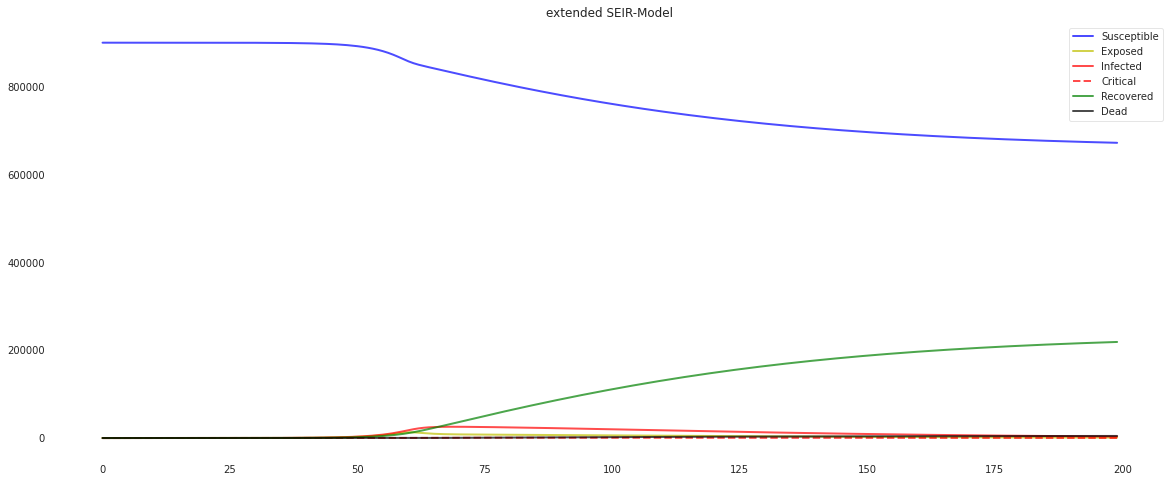

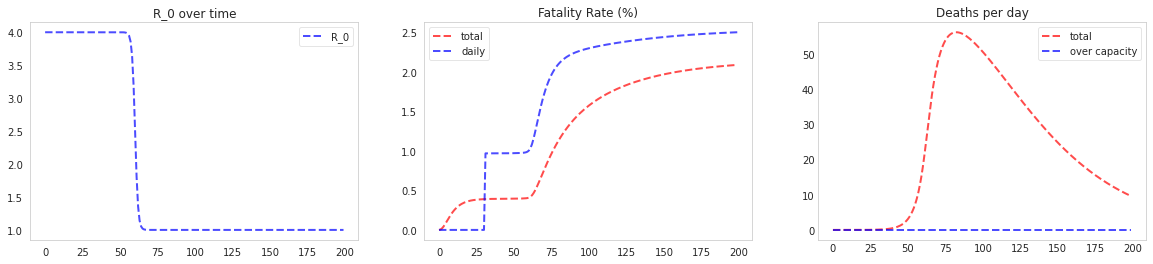

In [ ]:
plotter(*Model(days=200, agegroups=[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000], 
               beds_per_100k=400, R_0_start=4.0, k=1.0, x0=60, R_0_end=1.0, 
               prob_I_to_C=0.05, prob_C_to_D=0.6, s=0.003))

## Fit data to model

In [ ]:
outbreak_shift = 0 #how many days before or  after 21/1/2020 there was the first case in the country

In [ ]:
# choose country to fit
country = "Portugal"
data = covid_data[covid_data["Country/Region"] == country]["Value"].values[::-1] #data is an array with the number of *DEATHS* for each day
agegroups = agegroup_lookup[country] #find agegroups for desired country
beds_per_100k = beds_lookup[country] #find hospital beds for desired country

In [ ]:
#initialize models parameters
params_init_min_max = {"R_0_start": (3.0, 2.0, 5.0), "k": (2.5, 0.01, 5.0), "x0": (90, 0, 120), "R_0_end": (0.9, 0.3, 3.5),
                       "prob_I_to_C": (0.05, 0.01, 0.1), "prob_C_to_D": (0.5, 0.05, 0.8),
                       "s": (0.003, 0.001, 0.01)}  # form: {parameter: (initial guess, minimum value, max value)}

In [ ]:
days = outbreak_shift + len(data)
if outbreak_shift >= 0:
    y_data = np.concatenate((np.zeros(outbreak_shift), data))
else:
    y_data = y_data[-outbreak_shift:]
x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array

In [ ]:
y_data

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 1.200e+01,
       1.400e+01, 2.300e+01, 3.300e+01, 4.300e+01, 6.000e+01, 7.600e+01,
       1.000e+02, 1.190e+02, 1.400e+02, 1.600e+02, 1.870e+02, 2.090e+02,
       2.460e+02, 2.660e+02, 2.950e+02, 3.110e+02, 3.450e+02, 3.800e+02,
       4.090e+02, 4.350e+02, 4.700e+02, 5.040e+02, 

In [ ]:
def fitter(x, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):
    ret = Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s)
    return ret[6][x]

In [ ]:
mod = lmfit.Model(fitter)

for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"

In [ ]:
result = mod.fit(y_data, params, method="least_squares", x=x_data)

### Find the best fit for the given data

<function matplotlib.pyplot.show>

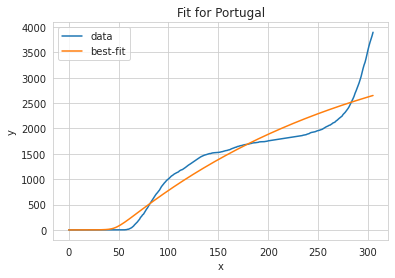

In [ ]:
result.plot_fit(datafmt="-")
plt.title("Fit for {}".format(country))
plt.show

In [ ]:
result.best_values

{'R_0_end': 0.9298992701366335,
 'R_0_start': 4.361037076034376,
 'k': 3.98522558375135,
 'prob_C_to_D': 0.7065383588865032,
 'prob_I_to_C': 0.09998978423108068,
 's': 0.0032405524568373777,
 'x0': 43.28648621468745}

Prediction for Portugal
percentage going to ICU: 9.998978423108069; percentage dying in ICU: 70.65383588865032


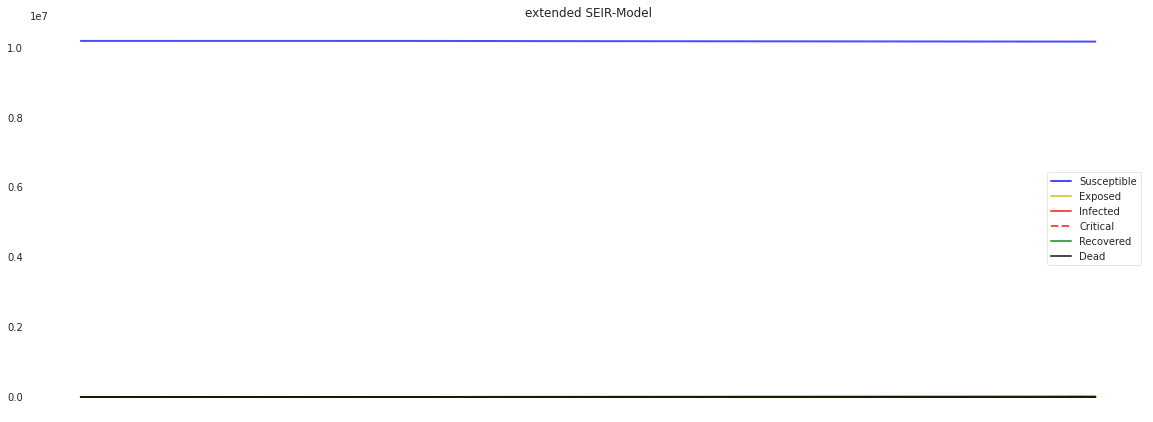

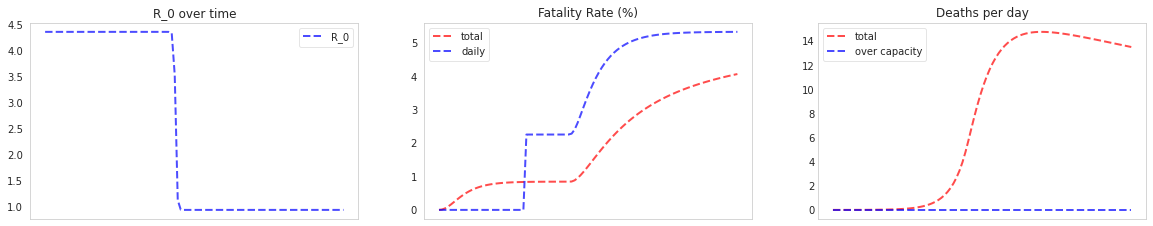

In [ ]:
full_days = 100
first_date = np.datetime64(covid_data.Date.min()) - np.timedelta64(outbreak_shift,'D')
x_ticks = pd.date_range(start=first_date, periods=full_days, freq="D")
print("Prediction for {}".format(country))
plotter(*Model(full_days, agegroup_lookup[country], beds_lookup[country], **result.best_values), x_ticks=x_ticks);